In [1]:
import sys
import os


sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../')))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from figure.Geom_figures import Ellipse, Triangle, Rectangle, Flower
from PDE.Conductivity_R2.Conductivity import Conductivity
from cfg import mconfig
from dict.CGPT.Invariant_descriptors import Compute_Invariants, ShapeRecognition_CGPT_frequency, ShapeRecognition_CGPT_majority_voting_frequency, ShapeRecognition_PT_freq
from figure.ImageShape.Image_shape import ImgShape
from tqdm import tqdm

In [3]:
#Set up the number of points
N = 2**9
#Set up typical size
delta = 0.2

In [4]:
#Create different inclusions
B1 = Ellipse(1, 1/2, phi=0.0, NbPts=N)
B2 = Triangle(1, np.pi/3, npts=N)
B3 = Rectangle(1, 1/2, N)
B4 = Flower(1, 1, N, 5, 0.3, tau=0.5)  # 5 petals
B5 = Flower(1, 1, N, 19, 0.3, tau=0.95)  # 19 petals
B6 = Flower(1, 1, N, 19, 0.3, tau=0)  # 19 petals, one damaged (tau different)
B7 = ImgShape('../../Test_images/A.png', N)
B8 = ImgShape('../../Test_images/B.png', N)
B9 = ImgShape('../../Test_images/C.png', N)
B10 = ImgShape('../../Test_images/D.png', N)
B11 = ImgShape('../../Test_images/E.png', N)
B12 = ImgShape('../../Test_images/F.png', N)
B13 = ImgShape('../../Test_images/G.png', N)
B14 = ImgShape('../../Test_images/H.png', N)
B15 = ImgShape('../../Test_images/I.png', N)
B16 = ImgShape('../../Test_images/J.png', N)
B17 = ImgShape('../../Test_images/K.png', N)
B18 = ImgShape('../../Test_images/L.png', N)
B19 = ImgShape('../../Test_images/M.png', N)
B20 = ImgShape('../../Test_images/N.png', N)
B21 = ImgShape('../../Test_images/O.png', N)
B22 = ImgShape('../../Test_images/P.png', N)
B23 = ImgShape('../../Test_images/Q.png', N)
B24 = ImgShape('../../Test_images/R.png', N)
B25 = ImgShape('../../Test_images/S.png', N)
B26 = ImgShape('../../Test_images/T.png', N)
B27 = ImgShape('../../Test_images/U.png', N)
B28 = ImgShape('../../Test_images/V.png', N)
B29 = ImgShape('../../Test_images/W.png', N)
B30 = ImgShape('../../Test_images/X.png', N)
B31 = ImgShape('../../Test_images/Y.png', N)
B32 = ImgShape('../../Test_images/Z.png', N)
B33 = ImgShape('../../Test_images/Cutie_patootie.png', N)


/home/ukech/Documents/ETHZ/Master_Thesis/Python Implementation/figure/C2Boundary/C2Boundary.py:29: RuntimeWarning: Curve may contain singluarities
  warnings.warn("Curve may contain singluarities", RuntimeWarning)


Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!
Successful extraction!


In [5]:
#Define a dictionary of shapes
D = [
      B1*delta, B2*delta, B3*delta, B4*delta, B5*delta, B6*delta,
      B7*delta, B8*delta, B9*delta, B10*delta, B11*delta, B12*delta, B13*delta, B14*delta, B15*delta, B16*delta,
      B17*delta, B18*delta, B19*delta, B20*delta, B21*delta, B22*delta, B23*delta, B24*delta, B25*delta, B26*delta,
      B27*delta, B28*delta, B29*delta, B30*delta, B31*delta, B32*delta, B33*delta
]


In [6]:
#Set conductivity and permitivitty for inclusions
cnd = 10 * np.ones(len(D)) 
pmtt = 5 * np.ones(len(D))

#Set up a list of working frequencies
freq = np.linspace(0,500*2*np.pi , endpoint=False, num=20)

/home/ukech/Documents/ETHZ/Master_Thesis/Python Implementation/figure/C2Boundary/C2Boundary.py:29: RuntimeWarning: Curve may contain singluarities
  warnings.warn("Curve may contain singluarities", RuntimeWarning)


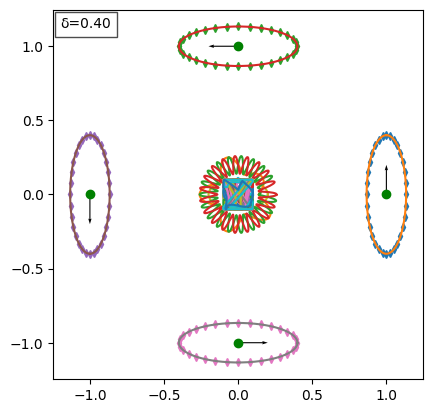

In [9]:
#Set up the fish body
Omega = Ellipse(1, 1/3, phi=0.0, NbPts=N) * delta*2
Omega = Omega < np.pi / 2
#Set up specific parameters for acquisition method
idxRcv = np.arange(0, Omega.nb_points-1,2**4)
Ns = 4
impd = 1
#Set up the fish acquisition system
cfg = mconfig.Fish_circle(Omega, idxRcv, np.zeros((2,1)), 1, Ns, 2*np.pi, impd=impd)
#Plot the configuration with the shapes
ax = plt.subplot()
cfg.plot(ax=ax)

for shape in D:
    shape.plot(ax=ax)

plt.show()


In [10]:
#Compute Invariants for the dictionary shapes

tau, mu = Compute_Invariants(D, cfg, cnd, pmtt, freq, 'fish', ord=1)

I1, I2 = Compute_Invariants(D, cfg, cnd, pmtt, freq, 'fish', ord=2)

I1h, I2h = Compute_Invariants(D, cfg, cnd, pmtt, freq, 'fish', ord=3)

Computing shapes:  12%|█▏        | 4/33 [01:14<08:59, 18.61s/it]


KeyboardInterrupt: 

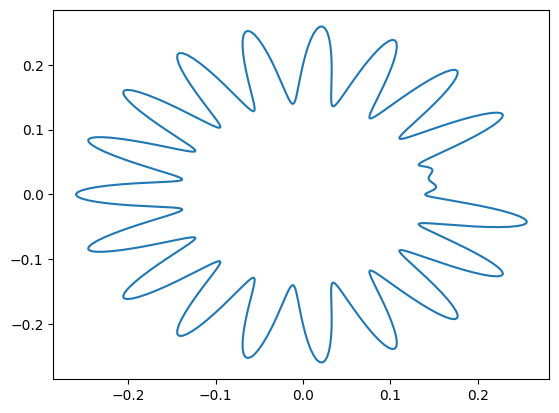

In [ ]:
#Define a true index for the shape:
true_index = 4
#Generate a new shape to recognize
Bnew = (D[true_index])

#Set up parameters to perturb the shape
epsilon = 0
p = 2**5
n = 1
#Perturb the chosen shape
Bnew = Bnew.global_perturbation(epsilon, p, n)

#Plot the chose shape
axx = plt.subplot()
Bnew.plot(ax=axx)
plt.show()

In [ ]:
#Define new conductivity and permitivitty values
cnd_new = np.array([cnd[true_index]])
pmtt_new = np.array([pmtt[true_index]])
nlvl = 0

#Compute the invariants of the new shape
tau_new, mu_new = Compute_Invariants([Bnew], cfg, cnd_new, pmtt_new, freq, 'fish', ord=1, noise_level=nlvl)

I1_new, I2_new =  Compute_Invariants([Bnew], cfg, cnd_new, pmtt_new, freq, 'fish', ord=2, noise_level=nlvl)
I1_newh, I2_newh =  Compute_Invariants([Bnew], cfg, cnd_new, pmtt_new, freq, 'fish', ord=3, noise_level=nlvl)

Computing shapes:   0%|          | 0/1 [00:00<?, ?it/s]/home/ukech/Documents/ETHZ/Master_Thesis/Python Implementation/figure/C2Boundary/C2Boundary.py:29: RuntimeWarning: Curve may contain singluarities
  warnings.warn("Curve may contain singluarities", RuntimeWarning)
Computing shapes: 100%|██████████| 1/1 [00:06<00:00,  6.40s/it]


In [ ]:
# Recognize the shape using different algorithms 
index_higher_order, error = ShapeRecognition_CGPT_frequency(I1, I2, I1_new, I2_new)
index_maj, votes = ShapeRecognition_CGPT_frequency(I1, I2, I1_newh, I2_newh)
index = ShapeRecognition_PT_freq(mu, mu_new)

print( "Recognized shape index PT:", index)
print( "Recognized shape index order 2:", index_higher_order)
print("Recognized shape index order 3", index_maj)
print("Votes per shape were:", votes)
print("True index:", true_index)
#Plot the results
plt.figure(figsize=(10, 5))
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Plot true shape
D[true_index].plot(ax=axs[0])
axs[0].set_title("True Shape (index {})".format(true_index))

# Plot recognized shape by PT
D[int(index)].plot(ax=axs[1])
axs[1].set_title("PT Recognized (index {})".format(index))

# Plot recognized shape by higher order
D[int(index_higher_order)].plot(ax=axs[2])
axs[2].set_title("QOI Recognized (index {})".format(index_higher_order))

# Plot recognized shape by majority voting
D[int(index_maj)].plot(ax=axs[3])
axs[3].set_title("Majority Voting (index {})".format(index_maj))

for ax in axs:
    ax.axis('equal')
    ax.axis('on')
    ax.grid(True)  # Add grid

plt.tight_layout()
plt.show()


ValueError: operands could not be broadcast together with shapes (2,2) (3,3) 

In [ ]:
# Parameters for the experiment
noise_levels = np.logspace(-3, 0, 15)
n_trials = 10  # Number of trials per noise level

success_rates_ord2 = {}
success_rates_ord1 = {}
success_rates_maj = {}

cnd_new = np.array([cnd[true_index]])
pmtt_new = np.array([pmtt[true_index]])

# Loop over all shapes in the dictionary as the true shape
all_success_rates_ord2 = {}
all_success_rates_ord1 = {}
all_success_rates_maj = {}

for idx in tqdm(range(len(D)), desc="True shape index"):
    true_index = idx
    cnd_new = np.array([cnd[true_index]])
    pmtt_new = np.array([pmtt[true_index]])
    success_rates_ord2 = {}
    success_rates_ord1 = {}
    success_rates_maj = {}
    Bnew = D[true_index]
    for noise in noise_levels:
        n_success_ord2 = 0
        n_success_ord1 = 0
        n_success_maj = 0
        for _ in range(n_trials):
            # Compute invariants with noise (order 2)
            I1_new, I2_new = Compute_Invariants([Bnew], cfg, cnd_new, pmtt_new, freq, 'fish', ord=2, noise_level=noise, verbose=False)
            recog_index_ord2, _ = ShapeRecognition_CGPT_frequency(I1, I2, I1_new, I2_new)
            if int(recog_index_ord2) == true_index:
                n_success_ord2 += 1
            # Majority voting
            recog_index_maj, _ = ShapeRecognition_CGPT_majority_voting_frequency(I1, I2, I1_new, I2_new)
            if int(recog_index_maj) == true_index:
                n_success_maj += 1
            # Compute invariants with noise (order 1)
            _, mu_new = Compute_Invariants([Bnew], cfg, cnd_new, pmtt_new, freq, 'fish', ord=1, noise_level=noise, verbose=False)
            recog_index_ord1 = ShapeRecognition_PT_freq(mu, mu_new)
            if int(recog_index_ord1) == true_index:
                n_success_ord1 += 1
        success_rates_ord2[noise] = n_success_ord2 / n_trials
        success_rates_ord1[noise] = n_success_ord1 / n_trials
        success_rates_maj[noise] = n_success_maj / n_trials
    all_success_rates_ord2[true_index] = success_rates_ord2
    all_success_rates_ord1[true_index] = success_rates_ord1
    all_success_rates_maj[true_index] = success_rates_maj

print("All success rates by noise level (order 2):", all_success_rates_ord2)
print("All success rates by noise level (order 1):", all_success_rates_ord1)
print("All success rates by noise level (majority voting):", all_success_rates_maj)


True shape index: 100%|██████████| 33/33 [21:27:24<00:00, 2340.74s/it]    

All success rates by noise level (order 2): {0: {np.float64(0.001): 1.0, np.float64(0.0016378937069540646): 1.0, np.float64(0.0026826957952797246): 1.0, np.float64(0.004393970560760791): 1.0, np.float64(0.0071968567300115215): 1.0, np.float64(0.011787686347935873): 1.0, np.float64(0.019306977288832496): 1.0, np.float64(0.03162277660168379): 1.0, np.float64(0.0517947467923121): 1.0, np.float64(0.08483428982440717): 0.6, np.float64(0.13894954943731375): 0.1, np.float64(0.22758459260747887): 0.0, np.float64(0.3727593720314938): 0.0, np.float64(0.6105402296585326): 0.0, np.float64(1.0): 0.0}, 1: {np.float64(0.001): 1.0, np.float64(0.0016378937069540646): 1.0, np.float64(0.0026826957952797246): 1.0, np.float64(0.004393970560760791): 1.0, np.float64(0.0071968567300115215): 1.0, np.float64(0.011787686347935873): 1.0, np.float64(0.019306977288832496): 1.0, np.float64(0.03162277660168379): 1.0, np.float64(0.0517947467923121): 1.0, np.float64(0.08483428982440717): 1.0, np.float64(0.1389495494373

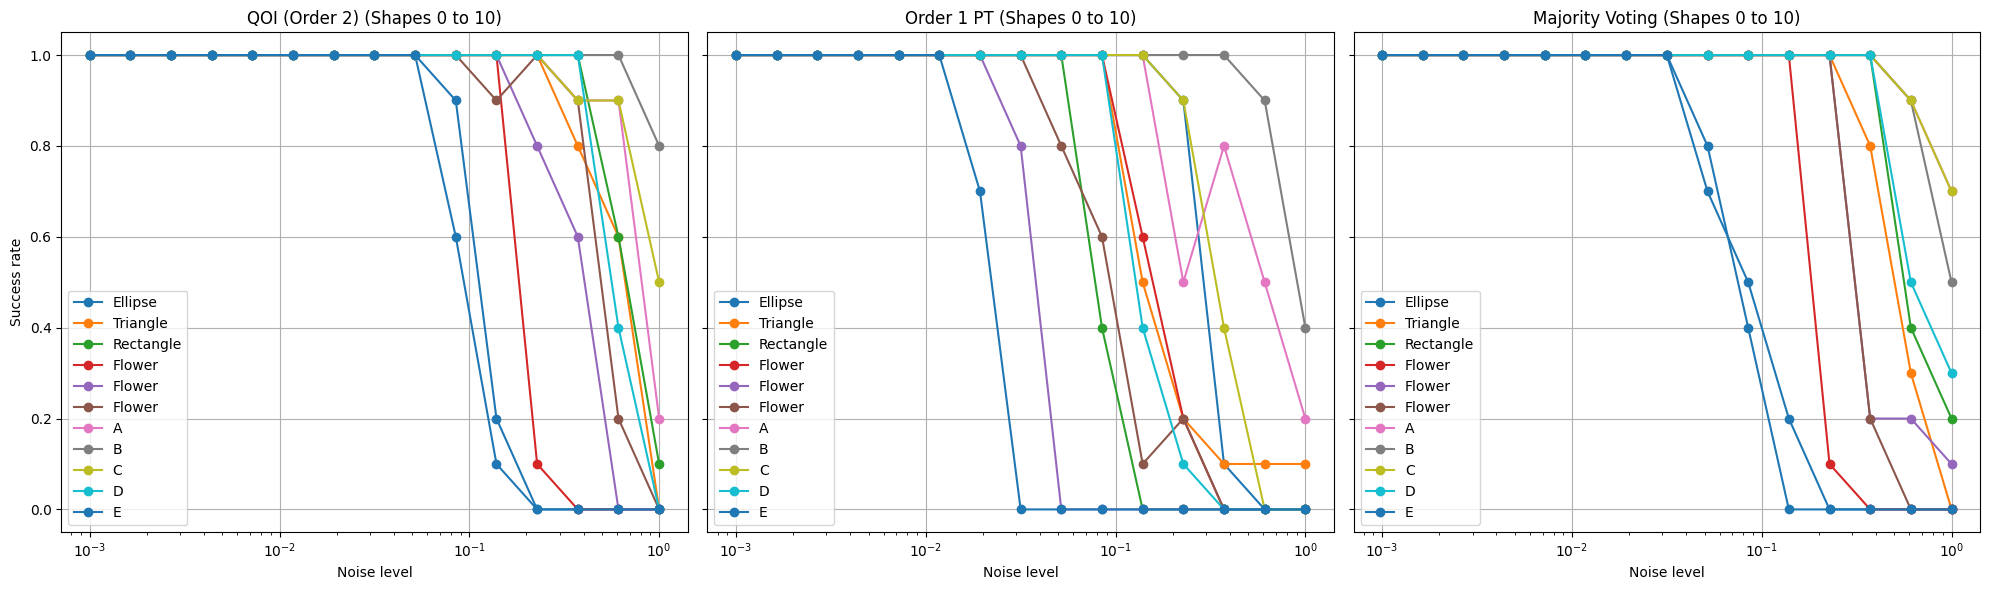

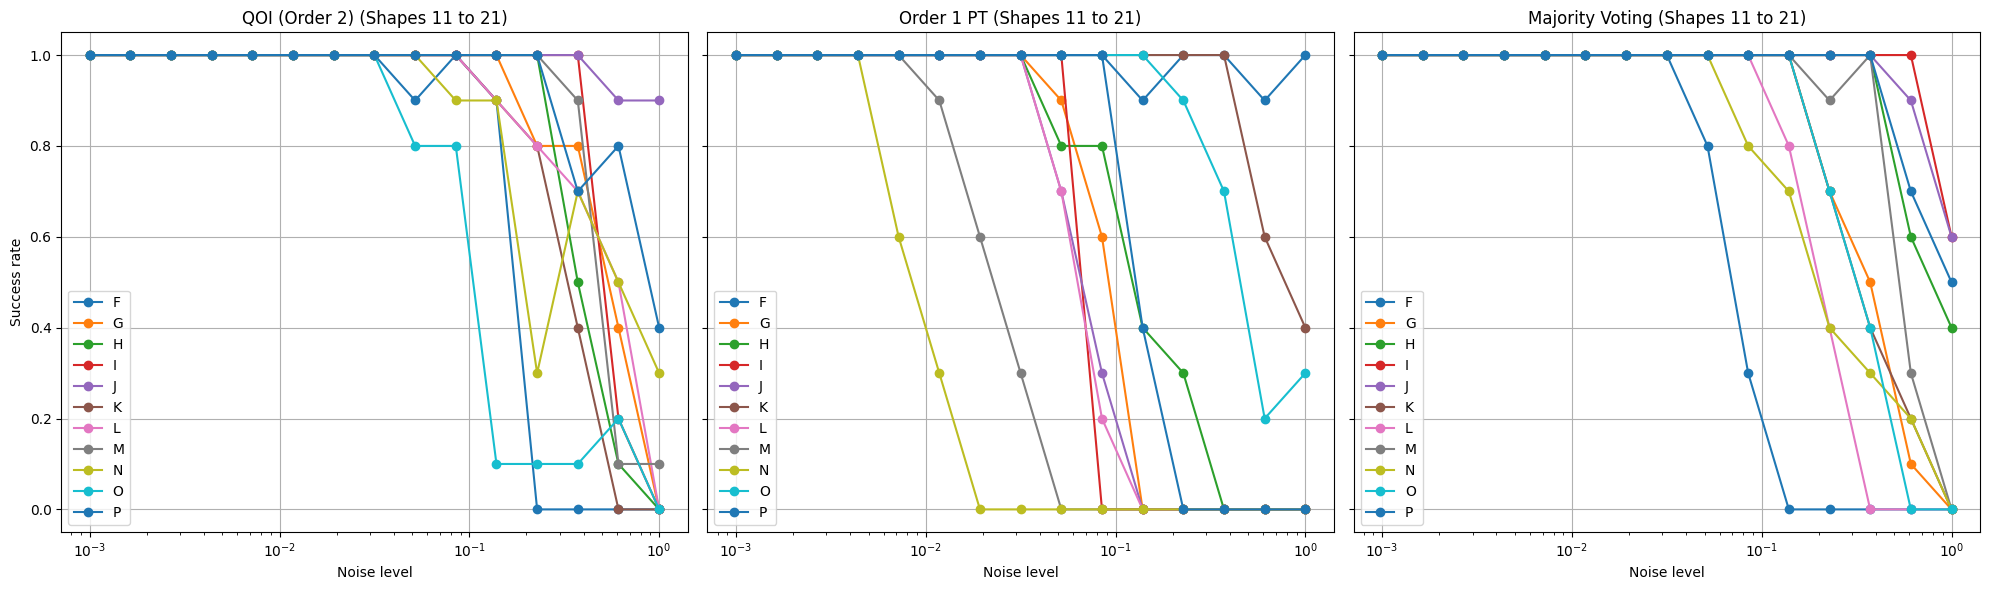

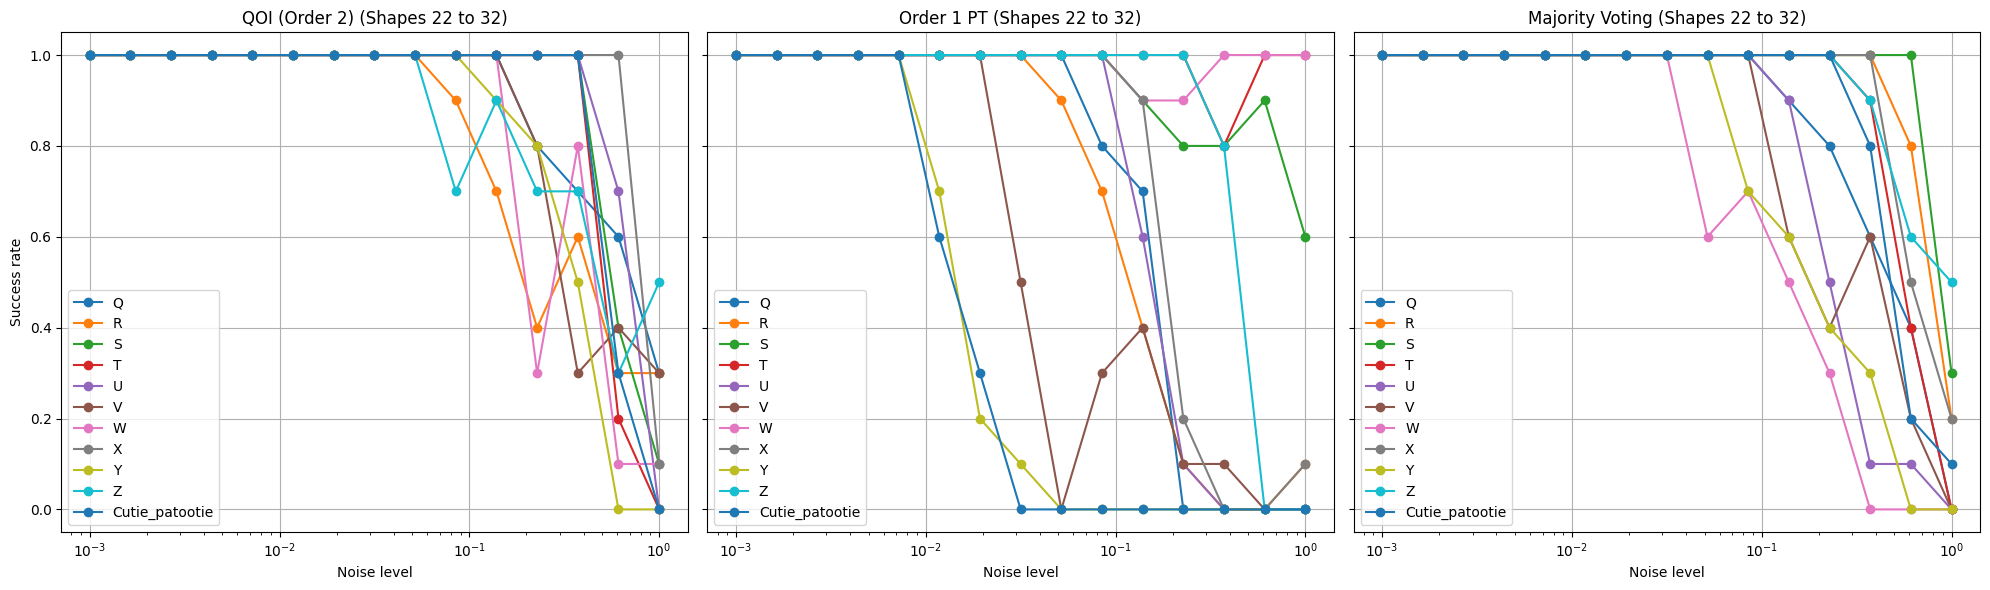

In [ ]:
# Plot success rates for each method, split into 9 plots, each with up to 11 shapes, with methods side by side
num_shapes = len(D)
shapes_per_plot = 11
num_plots = 3
methods = [
    ("QOI (Order 2)", all_success_rates_ord2),
    ("Order 1 PT", all_success_rates_ord1),
    ("Majority Voting", all_success_rates_maj)
]

for plot_idx in range(num_plots):
    fig, axs = plt.subplots(1, len(methods), figsize=(20, 6), sharey=True)
    start = plot_idx * shapes_per_plot
    end = min(start + shapes_per_plot, num_shapes)
    for ax, (method_title, all_rates) in zip(axs, methods):
        for idx in range(start, end):
            rates = all_rates.get(idx, {})
            if not rates:
                continue
            noise_sorted = sorted(rates.keys(), key=float)
            rates_sorted = [rates[n] for n in noise_sorted]
            # Use the shape's name for the label
            label = D[idx]._name_str
            ax.plot(noise_sorted, rates_sorted, marker='o', label=label)
        ax.set_xscale('log')
        ax.set_xlabel('Noise level')
        ax.set_title(f"{method_title} (Shapes {start} to {end-1})")
        ax.grid(True)
        ax.legend()
    axs[0].set_ylabel('Success rate')
    plt.tight_layout()
    plt.show()


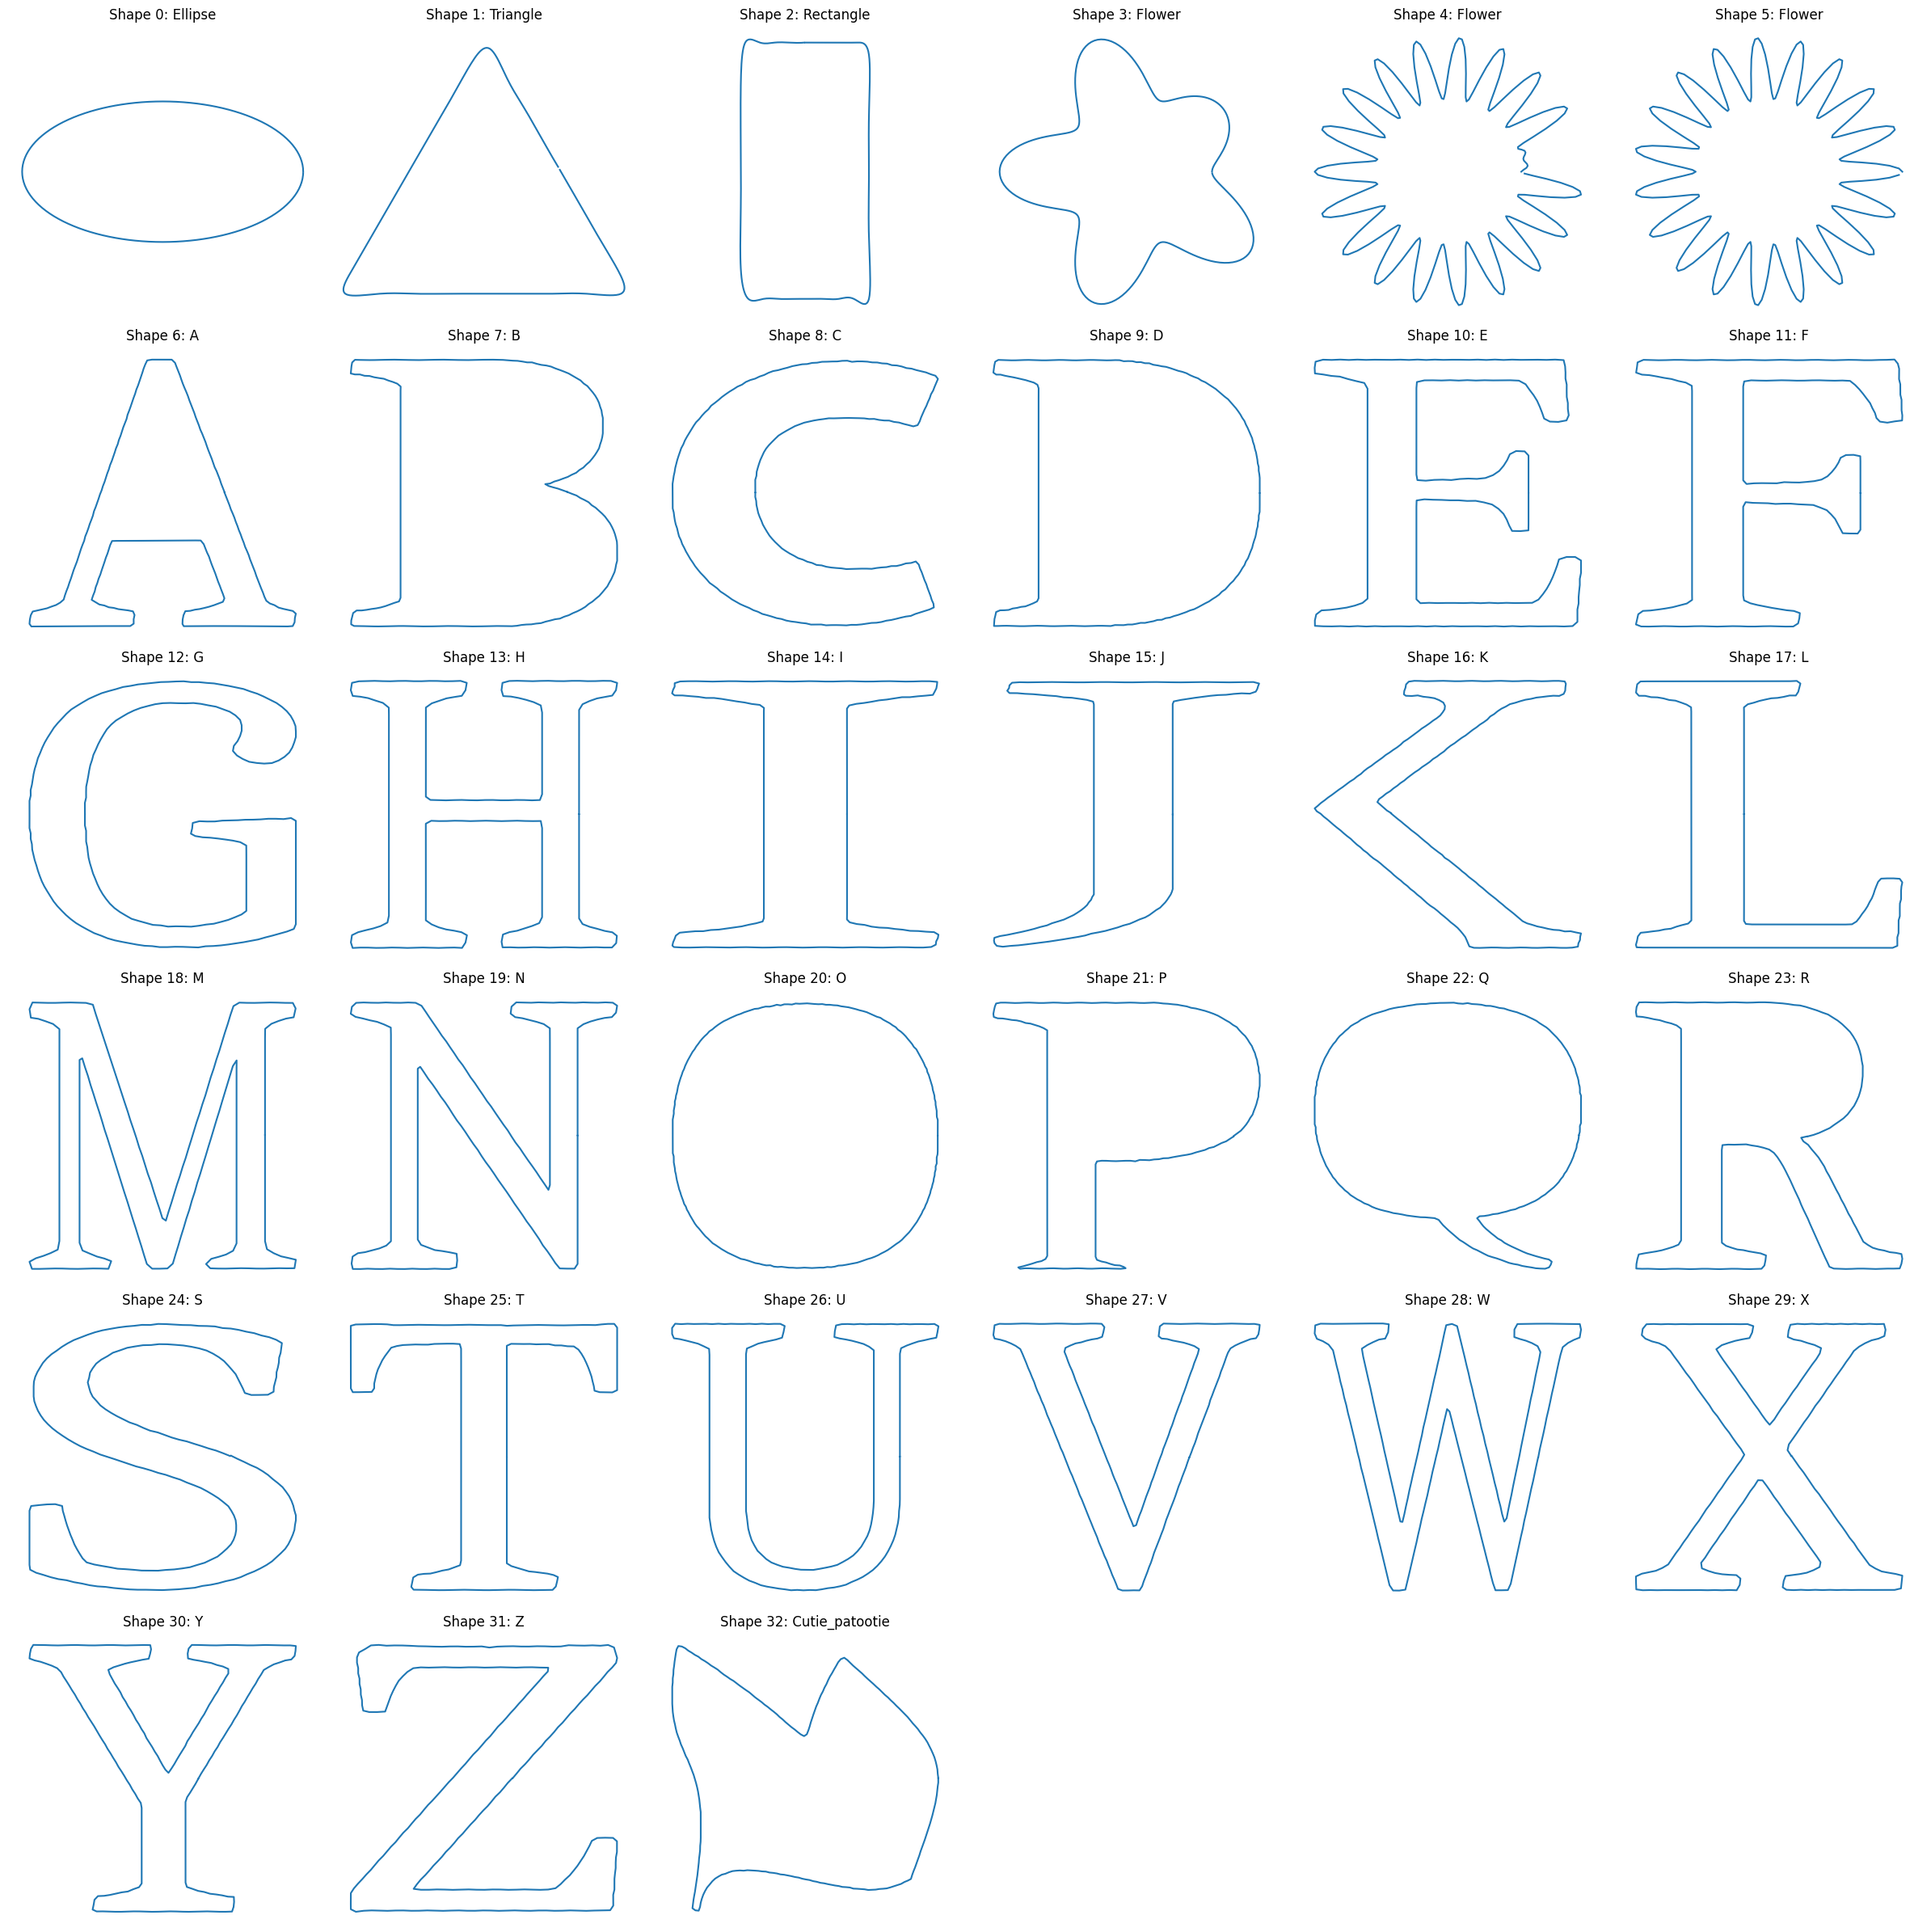

In [ ]:
import math

def plot_all_dictionary_shapes(D):
    """
    Plots every shape in the dictionary D in a grid of subplots.
    """
    import matplotlib.pyplot as plt

    num_shapes = len(D)
    cols = 6
    rows = math.ceil(num_shapes / cols)
    fig, axs = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
    axs = axs.flatten()
    for i, shape in enumerate(D):
        ax = axs[i]
        shape.plot(ax=ax)
        ax.set_title(f"Shape {i}: {getattr(shape, '_name_str', type(shape).__name__)}")
        ax.axis('equal')
        ax.grid(True)  # Enable grid
        ax.axis('off')

    # Hide any unused subplots
    for j in range(num_shapes, len(axs)):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show()
plot_all_dictionary_shapes(D)